# Assignment: Trees

## Do two questions in total: "Q1+Q2" or "Q1+Q3"

`! git clone https://github.com/ds3001f25/linear_models_assignment.git`

In [1]:
! git clone https://github.com/ds3001f25/linear_models_assignment.git

Cloning into 'linear_models_assignment'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 6 (from 1)
Receiving objects: 100% (9/9), 18.05 KiB | 9.02 MiB/s, done.


**Q1.** Please answer the following questions in your own words.
1. Why is the Gini a good loss function for categorical target variables?
A: The Gini is a good loss function for categorial target variables. Gini strikes a balance between probability theory and actuality. It works well with categorical variables because it does not require assumption of distributions which helps because there is not always a meaningful spread of catergorical variables.

2. Why do trees tend to overfit, and how can this tendency be constrained?
A: Trees tend to overfit because they grow too deep which means it is too complex and trained to the noise of the specific training data that new data is hard to process. This tendency can be constrained in a few different ways. One way is to impose a limit on the depth of the tree. By imposing a hard limit on how many levels the tree can have we can set a limit which will make the tree symmetric and this is sign of a bad preditor. Another way to contrain this tendency is force. Creating min samples per leaf will allow for discernment of approach depending on the data. If the data is very distinguished, the tree can go deep or if the data is not useful then it will be shallow. I can also impose a limit on the cases that appear to be "too pure" at the ending node. All of these are examples of data regulation because they stop overfitting early.


3. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.
A: False, Trees do not only really perform well in situations with lots of categorical variables as features/covariates. Trees handle mixed variables well, including both categorical and numerical features.

4. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?
A: Most versions of classification/regression tree concept do not allow for more than two branches after a split for multiple reasons. For one, every degree of a split can occur via a series of binary splits which makes the simple and efficient. On this same note, trying to split values with multiple features all at once is more difficult than splitting in two which allows for computational efficency.

5. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?
A: Some heuristic ways I can examine a tree and decide whether it is probable over- or under-fitting is examining the depth. If trees are very deep than that is a sign of overfitting due to a complex model that follows the noise of the data too much. This brings me to another way to evaluate, high performance on training data but low accuracy on new data which means generalizing is difficult for the model which is a sign of overfitting as well.

**Q2.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

1. Load the Breast Cancer METABRIC.csv dataset. How many observations and variables does it contain? Print out the first few rows of data.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
ls -al

total 20
drwxr-xr-x 1 root root 4096 Oct 17 20:44 ./
drwxr-xr-x 1 root root 4096 Oct 17 20:42 ../
drwxr-xr-x 4 root root 4096 Oct 16 13:41 .config/
drwxr-xr-x 4 root root 4096 Oct 17 20:44 linear_models_assignment/
drwxr-xr-x 1 root root 4096 Oct 16 13:41 sample_data/


In [13]:
cd linear_models_assignment/

/content/linear_models_assignment


In [14]:
ls -al

total 28
drwxr-xr-x 4 root root 4096 Oct 17 20:44 ./
drwxr-xr-x 1 root root 4096 Oct 17 20:44 ../
-rw-r--r-- 1 root root 7796 Oct 17 20:44 assignment.ipynb
drwxr-xr-x 2 root root 4096 Oct 17 20:44 data/
drwxr-xr-x 8 root root 4096 Oct 17 20:44 .git/
-rw-r--r-- 1 root root  210 Oct 17 20:44 README.md


In [16]:
cd data

/content/linear_models_assignment/data


In [17]:
ls -al

total 100
drwxr-xr-x 2 root root  4096 Oct 17 20:44 ./
drwxr-xr-x 4 root root  4096 Oct 17 20:44 ../
-rw-r--r-- 1 root root 88346 Oct 17 20:44 cars_hw.csv
-rw-r--r-- 1 root root  2322 Oct 17 20:44 heart_hw.csv


In [18]:
breast_cancer = pd.read_csv('heart_hw.csv')
breast_cancer.head()

,Unnamed: 0,age,transplant,y
0,1,53,control,0
1,2,43,control,0
2,3,52,control,0
3,4,52,control,0
4,5,54,control,0


2. We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include Tumor Size, Lymph nodes examined positive, Age at Diagnosis. For categorical variables, we'll include Tumor Stage, Chemotherapy, and Cancer Type Detailed. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix,  𝑋 .

In [23]:
print(breast_cancer.columns)

Index(['Unnamed: 0', 'age', 'transplant', 'y'], dtype='object')


In [21]:
from sklearn.tree import DecisionTreeRegressor # Import the tree classifier
from sklearn.tree import plot_tree # Import the tree classifier
from sklearn.model_selection import train_test_split # Train/test splitter

In [25]:
# Define the numeric and categorical features
numeric_features = ['age']
categorical_features = ['transplant']

# Select the numeric and categorical columns
numeric_data = breast_cancer[numeric_features]
categorical_data = breast_cancer[categorical_features]

# One-hot encode the categorical variables
categorical_data_encoded = pd.get_dummies(categorical_data, columns=categorical_features)

# Concatenate the numeric and one-hot encoded categorical variables
X = pd.concat([numeric_data, categorical_data_encoded], axis=1)

# Define the target variable y
y = breast_cancer['y']

# Display the first few rows of the feature matrix X and the target variable y
display(X.head())
display(y.head())

# Print the shape of the feature matrix X and the target variable y
print(f"Shape of feature matrix X: {X.shape}")
print(f"Shape of target variable y: {y.shape}")

,age,transplant_control,transplant_treatment
0,53,True,False
1,43,True,False
2,52,True,False
3,52,True,False
4,54,True,False


,y
0,0
1,0
2,0
3,0
4,0


Shape of feature matrix X: (103, 3)
Shape of target variable y: (103,)


3. Let's predict Overall Survival Status given the features/covariates  𝑋 . There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

Confusion Matrix:
[[13  1]
 [ 6  1]]

Accuracy: 0.6666666666666666


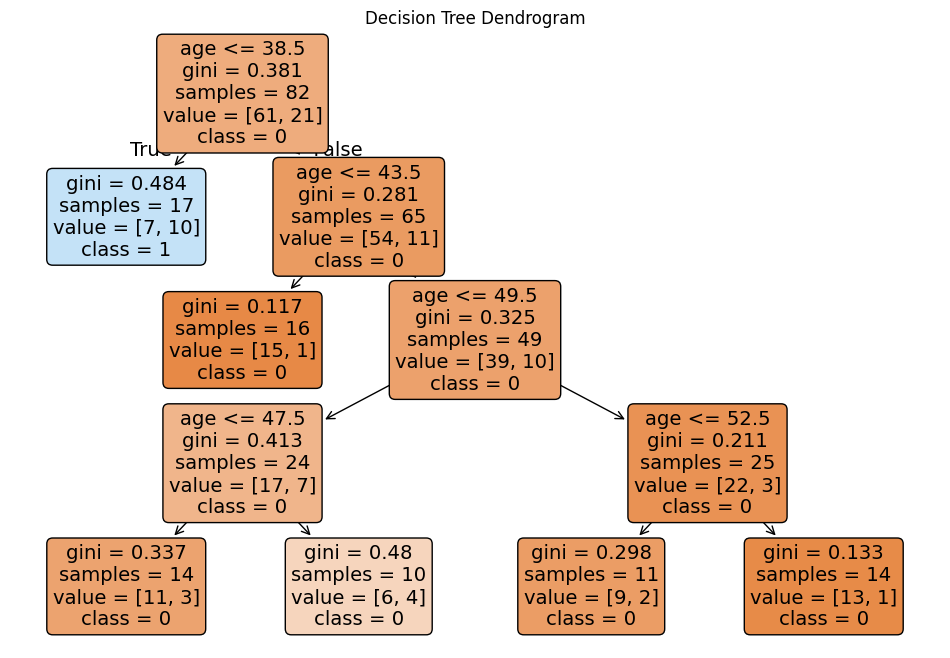

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


#drop rows with missing values in living df
breast_cancer.dropna(inplace=True)

#redefining x and y after dropping
numeric_features=['age']
categorical_features=['transplant']
numeric_data=breast_cancer[numeric_features]
categorical_data=breast_cancer[categorical_features]
categorical_data_encoded=pd.get_dummies(categorical_data, columns=categorical_features)
X=pd.concat([numeric_data, categorical_data_encoded], axis=1)
y=breast_cancer['y']

#split data in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#constraining miniumum samples per leaf to ten
tree_clf = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)

#training classifier
tree_clf.fit(X_train, y_train)

#making predictions on test set
y_pred = tree_clf.predict(X_test)

#print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy}")

#plot decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.title("Decision Tree Dendrogram")
plt.show()


4. For your model in part three, compute three statistics:

The true positive rate or sensitivity:
𝑇𝑃𝑅=𝑇𝑃/(𝑇𝑃+𝐹𝑁)
The true negative rate or specificity:
𝑇𝑁𝑅=𝑇𝑁/(𝑇𝑁+𝐹𝑃)
Does your model tend to perform better with respect to one of these metrics?

In [32]:
#confusion matrix
tab = pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames=['Predicted'])
acc = (tab.iloc[0,0] + tab.iloc[1,1]) / (tab.iloc[0,0] + tab.iloc[0,1] + tab.iloc[1,0] + tab.iloc[1,1])
print ('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_pred)

Accuracy:  0.6666666666666666 



col_0,0,1
y,,
0,13,1
1,6,1


In [30]:
#confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#compute true positive rate sensitivity
tpr = tp / (tp + fn) if (tp + fn) > 0 else 0

#compute true negative rate specificity
tnr = tn / (tn + fp) if (tn + fp) > 0 else 0

#print the above rates
print(f"True Positive Rate (Sensitivity): {tpr}")
print(f"True Negative Rate (Specificity): {tnr}")

True Positive Rate (Sensitivity): 0.14285714285714285
True Negative Rate (Specificity): 0.9285714285714286


In [31]:
#determining which metric the model performs better on
#since tnr is greater than tpr meaning the true negative rate specificity is higher than true positive rate sensitivity which means that the model performs better with respect to true negative rate (specificity)
if tpr > tnr:
    print("\nThe model tends to perform better with respect to True Positive Rate (Sensitivity).")
elif tnr > tpr:
    print("\nThe model tends to perform better with respect to True Negative Rate (Specificity).")
else:
    print("\nThe model performs equally well with respect to both True Positive Rate and True Negative Rate.")


The model tends to perform better with respect to True Negative Rate (Specificity).


5. Let's predict Overall Survival (Months) given the features/covariates  𝑋 . Use the train/test split to pick the optimal min_samples_leaf value that gives the highest  𝑅2  on the test set (it's about 110). What is the  𝑅2 ? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

In [40]:
#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
#pick the optimal min_samples_leaf values that give the highest R2 on the test set
min_samples_leaf_values = range(1, 151, 10)

best_min_samples_leaf = None
best_r2 = -float('inf')

#loop through min_samples_leaf options to choose the best
for min_samples_leaf in min_samples_leaf_values:
    tree_reg = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf, random_state=42)
    tree_reg.fit(X_train, y_train) #training
    y_pred = tree_reg.predict(X_test) #making prediction
    r2 = r2_score(y_test, y_pred) #calculating r2 score
    if r2 > best_r2: #comparing current r to the best r found in this cycle to see which one is better
        best_r2 = r2
        best_min_samples_leaf = min_samples_leaf

#printing statements about optimal min_samples_leaf and best R2
print(f"Optimal min_samples_leaf: {best_min_samples_leaf}")
print(f"Highest R-squared on the test set: {best_r2}")


Optimal min_samples_leaf: 11
Highest R-squared on the test set: -0.0005489129966003148


In [42]:
#using decision tree regressor
tree_reg_optimal = DecisionTreeRegressor(min_samples_leaf=best_min_samples_leaf, random_state=42)
tree_reg_optimal.fit(X_train, y_train) #training regression
y_pred_optimal = tree_reg_optimal.predict(X_test) #making prediction
r2_optimal = r2_score(y_test, y_pred_optimal) #calculating R2

#printing statement about R2 and optimal min_samples_leaf
print(f"R-squared on the test set with optimal min_samples_leaf: {r2_optimal}")

R-squared on the test set with optimal min_samples_leaf: -0.0005489129966003148


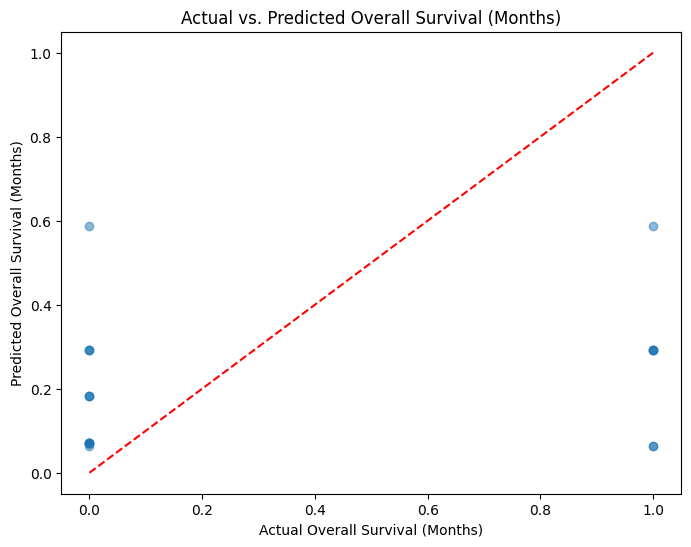

In [43]:
#plotting test values against the predicted values

#creating scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_optimal, alpha=0.5)

#creating labels
plt.xlabel("Actual Overall Survival (Months)")
plt.ylabel("Predicted Overall Survival (Months)")
plt.title("Actual vs. Predicted Overall Survival (Months)")

#visualizing perfect predictions with line
max_val = max(y_test.max(), y_pred_optimal.max())
min_val = min(y_test.min(), y_pred_optimal.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

#displaying plot
plt.show()

Q: How do you feel about this model for clinical purposes?
A: In a clinical setting this model would probably not be useful and unreliable for predicting a patients odds of survival. Because the R-squared value is ~ -0.0005 and the scatter plot is no where near in alignment with the ideal predications, it seems the predictive performance of the model for the overall survival in months is very poor. The inaccuracy of the predictions would be unfit for the clinical setting because it could result in inappropriate and unjustified medical treatments and interventions which ultimately will lead to mismanaged patient care and negative patient health outcomes and experience. A better suited model for the clinical setting would require more accurate and reliable which would mean that there would need to be a higher R-square and a scatterplot where the actual and predicted values are in alignment, unlike the current scatterplot where is a lot of variance between actual and predicted.

**Q3.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?